# QFAT - Assignment D - Group 16

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

C:\Users\Samuel\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Take a look at the data + Clean it

In [2]:
df = pd.read_csv('Industry.csv')
display(df)

,mdate,Rf,MktRf,Food,Beer,Smoke,Games,Books,Hshld,Clths,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192607,0.22%,2.62%,0.53%,-5.19%,1.29%,2.30%,10.97%,-0.50%,8.08%,...,0.83%,9.22%,2.06%,7.66%,1.91%,-23.79%,-2.94%,1.83%,0.16%,5.20%
1,192608,0.25%,2.56%,2.71%,27.03%,6.53%,0.54%,10.01%,-3.58%,-2.51%,...,2.17%,2.02%,4.40%,-2.37%,4.87%,5.39%,-0.56%,-0.09%,4.38%,6.76%
2,192609,0.23%,0.36%,1.29%,4.02%,1.22%,5.92%,-0.99%,0.71%,-0.51%,...,2.41%,2.25%,0.18%,-5.55%,0.06%,-7.87%,0.17%,-0.58%,-1.36%,-3.86%
3,192610,0.32%,-3.43%,-3.13%,-3.31%,1.07%,-4.41%,9.47%,-4.66%,0.12%,...,-0.11%,-2.00%,-1.08%,-5.03%,-2.65%,-15.38%,-5.34%,-4.13%,-5.09%,-8.49%
4,192611,0.31%,2.44%,6.28%,7.29%,4.41%,2.60%,-5.80%,-0.51%,1.87%,...,1.63%,3.77%,3.64%,3.81%,1.59%,4.67%,4.04%,4.32%,2.29%,4.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,201008,0.01%,-4.40%,-0.41%,-0.02%,-0.06%,-1.21%,-9.88%,-3.83%,-7.17%,...,-1.95%,-5.01%,-8.40%,-6.07%,-5.16%,-7.56%,-4.23%,0.49%,-8.43%,-4.17%
1010,201009,0.01%,9.24%,1.65%,4.94%,10.04%,14.31%,12.65%,3.80%,17.33%,...,7.94%,11.37%,13.64%,9.12%,10.21%,9.83%,13.69%,7.35%,7.23%,8.09%
1011,201010,0.01%,3.89%,5.81%,1.87%,5.28%,12.71%,7.33%,4.37%,3.54%,...,4.41%,7.71%,4.43%,3.52%,5.51%,4.97%,1.30%,6.02%,1.67%,-1.34%
1012,201011,0.01%,0.58%,-1.94%,1.96%,-3.79%,7.46%,-3.48%,-2.53%,8.98%,...,-1.93%,-2.22%,1.00%,0.28%,2.30%,0.25%,5.00%,4.16%,-0.26%,-0.44%


In [3]:
#First we remove the % sign
df_columns_names = ['Rf', 'MktRf', 'Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth', 'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']

for i in df_columns_names:
    df[str(i)] = df[str(i)].str.replace("%", "")

In [4]:
#Convert the datatypes from strings to float
df = df.astype(float)
df['mdate'] = df['mdate'].astype(int)

In [5]:
# Dataframe is expressed in percentage, we wonvert in decimals
for i in df_columns_names:
    df[str(i)] = df[str(i)] / 100

In [6]:
df

,mdate,Rf,MktRf,Food,Beer,Smoke,Games,Books,Hshld,Clths,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192607,0.0022,0.0262,0.0053,-0.0519,0.0129,0.0230,0.1097,-0.0050,0.0808,...,0.0083,0.0922,0.0206,0.0766,0.0191,-0.2379,-0.0294,0.0183,0.0016,0.0520
1,192608,0.0025,0.0256,0.0271,0.2703,0.0653,0.0054,0.1001,-0.0358,-0.0251,...,0.0217,0.0202,0.0440,-0.0237,0.0487,0.0539,-0.0056,-0.0009,0.0438,0.0676
2,192609,0.0023,0.0036,0.0129,0.0402,0.0122,0.0592,-0.0099,0.0071,-0.0051,...,0.0241,0.0225,0.0018,-0.0555,0.0006,-0.0787,0.0017,-0.0058,-0.0136,-0.0386
3,192610,0.0032,-0.0343,-0.0313,-0.0331,0.0107,-0.0441,0.0947,-0.0466,0.0012,...,-0.0011,-0.0200,-0.0108,-0.0503,-0.0265,-0.1538,-0.0534,-0.0413,-0.0509,-0.0849
4,192611,0.0031,0.0244,0.0628,0.0729,0.0441,0.0260,-0.0580,-0.0051,0.0187,...,0.0163,0.0377,0.0364,0.0381,0.0159,0.0467,0.0404,0.0432,0.0229,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,201008,0.0001,-0.0440,-0.0041,-0.0002,-0.0006,-0.0121,-0.0988,-0.0383,-0.0717,...,-0.0195,-0.0501,-0.0840,-0.0607,-0.0516,-0.0756,-0.0423,0.0049,-0.0843,-0.0417
1010,201009,0.0001,0.0924,0.0165,0.0494,0.1004,0.1431,0.1265,0.0380,0.1733,...,0.0794,0.1137,0.1364,0.0912,0.1021,0.0983,0.1369,0.0735,0.0723,0.0809
1011,201010,0.0001,0.0389,0.0581,0.0187,0.0528,0.1271,0.0733,0.0437,0.0354,...,0.0441,0.0771,0.0443,0.0352,0.0551,0.0497,0.0130,0.0602,0.0167,-0.0134
1012,201011,0.0001,0.0058,-0.0194,0.0196,-0.0379,0.0746,-0.0348,-0.0253,0.0898,...,-0.0193,-0.0222,0.0100,0.0028,0.0230,0.0025,0.0500,0.0416,-0.0026,-0.0044


## 1.1: Exploration

Starting in 1927/07, for each industry and each month, compute the (arithmetic) average return over the previous 12 month for that industry (not including the month itself). Then for each month, rank the industries based on their past average return (hint: Excel has a function called “RANK(cell,range,1)”). Compute each industry’s average rank (1=lowest past average return, etc.).

In [7]:
# Compute the (arithmetic) average return over the previous 12 month for that industry (not including the month itself).
df_industry_returns = df.copy()
mdate = df_industry_returns['mdate']
df_industry_returns = df_industry_returns.drop(['mdate', 'Rf', 'MktRf'], axis=1)
# df_industry_returns = df_industry_returns.rolling(window=13).apply(lambda x: x[:12].mean()) MAIN DIFFERENCE SAM & FATIMA!
df_industry_returns = df_industry_returns.rolling(window=12).mean().shift(1)
df_industry_returns = df_industry_returns.dropna()
df_industry_returns.reset_index(inplace=True)
df_industry_returns.drop('index', axis=1, inplace=True)

In [8]:
df_industry_returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,0.016150,0.041758,0.031417,0.001783,0.041417,0.009667,0.017300,0.022383,0.038308,0.032392,...,0.016175,0.033017,0.029233,0.002292,0.018983,-0.067650,0.004367,0.017283,0.016100,0.002383
1,0.019900,0.049908,0.034017,0.000517,0.033758,0.014683,0.015583,0.029217,0.046442,0.035233,...,0.018592,0.027125,0.032508,0.005925,0.022417,-0.038567,0.014858,0.019658,0.022483,0.003725
2,0.019550,0.024067,0.031792,0.004342,0.029967,0.018100,0.018950,0.025692,0.043683,0.029117,...,0.017142,0.032158,0.031017,0.011033,0.016950,-0.045208,0.026650,0.020192,0.020050,0.003025
3,0.023583,0.026558,0.034692,0.002883,0.039158,0.019625,0.023267,0.029892,0.044233,0.028558,...,0.020575,0.032075,0.034342,0.018467,0.020492,-0.033983,0.030767,0.025625,0.026142,0.006600
4,0.024142,0.028650,0.033533,0.006608,0.033458,0.021992,0.031225,0.034775,0.042008,0.026417,...,0.018925,0.037883,0.031367,0.022775,0.018875,-0.039317,0.030108,0.027608,0.034108,0.010658


In [9]:
# For each month, rank the industries based on their past average return.
industry_ranks = df_industry_returns.rank(axis=1)

In [10]:
industry_ranks.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,14.0,30.0,24.0,3.0,29.0,7.0,17.0,20.0,28.0,25.0,...,15.0,26.0,23.0,4.0,18.0,1.0,6.0,16.0,13.0,5.0
1,15.0,30.0,27.0,3.0,26.0,8.0,10.0,22.0,29.0,28.0,...,13.0,19.0,24.0,5.0,16.0,1.0,9.0,14.0,17.0,4.0
2,14.0,17.0,26.0,4.0,24.0,10.0,13.0,18.0,30.0,22.0,...,9.0,27.0,25.0,5.0,8.0,1.0,20.0,16.0,15.0,3.0
3,13.0,17.0,27.0,3.0,29.0,8.0,12.0,20.0,30.0,19.0,...,10.0,22.0,25.0,7.0,9.0,1.0,21.0,15.0,16.0,4.0
4,13.0,18.0,24.0,3.0,23.0,10.0,20.0,27.0,30.0,15.0,...,9.0,28.0,21.0,12.0,8.0,1.0,19.0,16.0,25.0,5.0


In [11]:
# Compute each industry’s average rank (1=lowest past average return, etc.).
average_ranks = industry_ranks.mean(axis=0).sort_values()

In [12]:
average_ranks

Telcm    14.088323
Other    14.216068
Clths    14.540918
Util     14.767465
Whlsl    14.773453
Steel    14.890220
Cnstr    14.908184
Hshld    14.943114
Mines    14.957086
Books    14.974052
Trans    14.999002
Food     15.183633
Txtls    15.238523
Rtail    15.381737
Chems    15.488024
Paper    15.507984
Hlth     15.657186
FabPr    15.761477
Fin      15.802395
Oil      15.910679
Meals    15.951098
Coal     16.004990
Autos    16.013473
BusEq    16.093812
Smoke    16.216567
Games    16.247505
Beer     16.386228
Servs    16.410679
Carry    16.518463
ElcEq    17.167665
dtype: float64

#### 1.1a: Which industry has the lowest average rank and which has the highest?

In [13]:
print("The industry that has the lowest average rank is:",str(average_ranks.index[0]))
print("The industry that has the highest average rank is:",str(average_ranks.index[-1]))

The industry that has the lowest average rank is: Telcm
The industry that has the highest average rank is: ElcEq


#### 1.1b: What is the average rank of these lowest and highest industries?

In [14]:
print("The average rank of the lowest industry is:",str(average_ranks[0]))
print("The average rank of the highest industry is:",str(average_ranks[-1]))

The average rank of the lowest industry is: 14.088323353293413
The average rank of the highest industry is: 17.167664670658684


#### 1.1c: Plot of the rank of Autos industry over time.

In [15]:
series_rank_autos_industry = industry_ranks['Autos'] #Here we only take the ranks of the Autos industry
dates = pd.to_datetime(mdate, format='%Y%m')
df_rank_autos_industry = pd.concat([dates, series_rank_autos_industry], axis=1) #Here we create a new dataframe with the months and ranks of the Autos industry
df_rank_autos_industry.dropna(inplace=True)
df_rank_autos_industry.reset_index(inplace=True)
df_rank_autos_industry.drop('index', axis=1, inplace=True)

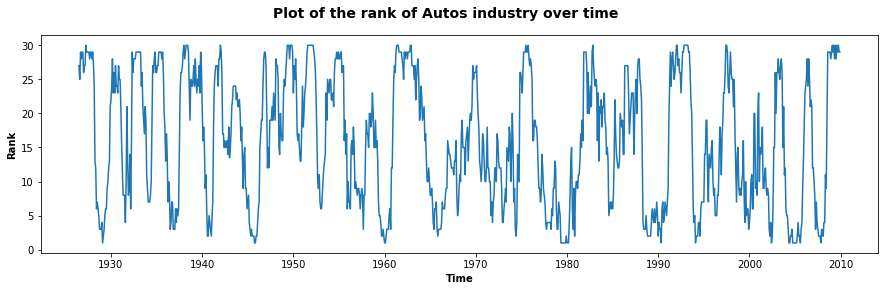

In [16]:
fig, ax = plt.subplots(figsize=(15, 4))

plt.plot(df_rank_autos_industry['mdate'], df_rank_autos_industry['Autos'])
ax.set_xlabel('Time', fontweight='bold')
ax.set_ylabel('Rank', fontweight='bold')
fig.suptitle('Plot of the rank of Autos industry over time', fontsize=14, fontweight='bold')

plt.show()

#### 1.1d: Are the top industries stable or moving around a lot? I.e., is industry momentum a long-term bet on a few industries or a very dynamic strategy? Do you expect high or low turnover from this strategy?

In [17]:
dates = dates[12:]

In [18]:
# We can check this by taking for example the five highst ranked industries on average and plot them and see if it fluctuates or stays stable over time
pd_rank_top5_industries = industry_ranks[['Games', 'Beer', 'Servs', 'Carry', 'ElcEq']] #Here we only take the ranks of the top 5 industries
pd_rank_top5_industries['dates'] = dates.values
pd_rank_top5_industries = pd_rank_top5_industries[['dates', 'Games', 'Beer', 'Servs', 'Carry', 'ElcEq']]
pd_rank_top5_industries.dropna(inplace=True)
pd_rank_top5_industries.reset_index(inplace=True)
pd_rank_top5_industries.drop('index', axis=1, inplace=True)

In [19]:
pd_rank_top5_industries

,dates,Games,Beer,Servs,Carry,ElcEq
0,1927-07-01,3.0,30.0,26.0,11.0,19.0
1,1927-08-01,3.0,30.0,19.0,18.0,21.0
2,1927-09-01,4.0,17.0,27.0,19.0,28.0
3,1927-10-01,3.0,17.0,22.0,18.0,24.0
4,1927-11-01,3.0,18.0,28.0,14.0,22.0
...,...,...,...,...,...,...
997,2010-08-01,29.0,11.0,9.0,28.0,23.0
998,2010-09-01,30.0,18.0,8.0,17.0,21.0
999,2010-10-01,29.0,12.0,10.0,18.0,23.0
1000,2010-11-01,30.0,5.0,11.0,19.0,25.0


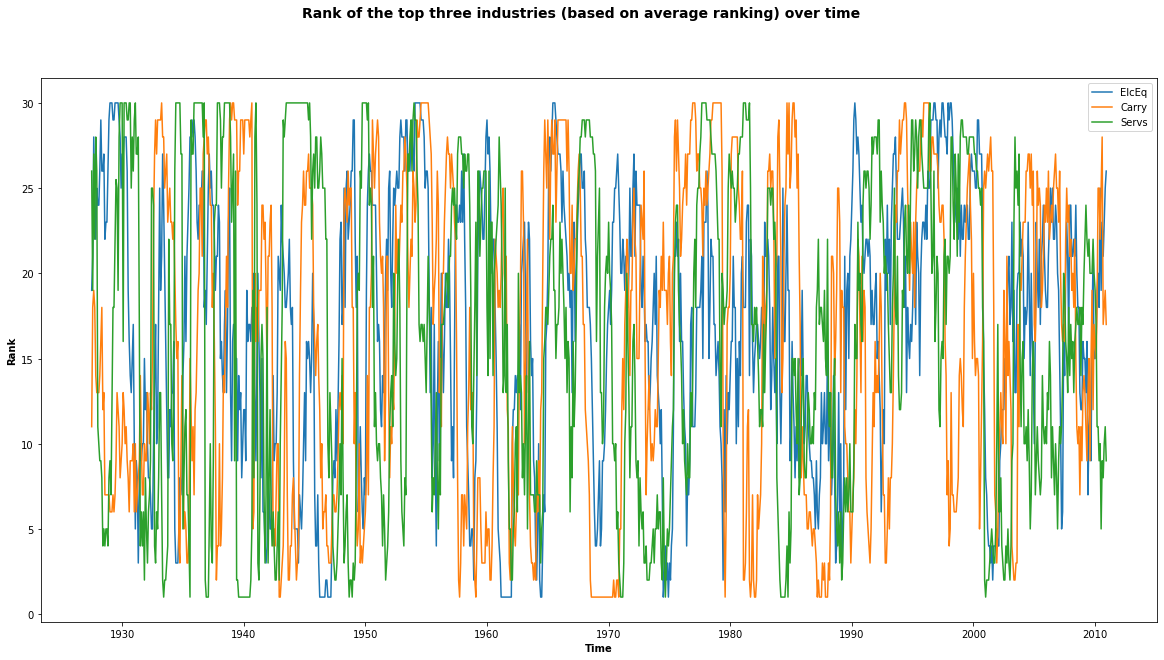

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(pd_rank_top5_industries['dates'], pd_rank_top5_industries['ElcEq'], label='ElcEq')
plt.plot(pd_rank_top5_industries['dates'], pd_rank_top5_industries['Carry'], label='Carry')
plt.plot(pd_rank_top5_industries['dates'], pd_rank_top5_industries['Servs'], label='Servs')
# plt.plot(pd_rank_top5_industries['dates'], pd_rank_top5_industries['Beer'], label='Beer')
# plt.plot(pd_rank_top5_industries['dates'], pd_rank_top5_industries['Games'], label='Games')

ax.set_xlabel('Time', fontweight='bold')
ax.set_ylabel('Rank', fontweight='bold')
fig.suptitle('Rank of the top three industries (based on average ranking) over time', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

In [21]:
print("""
Answer to the question:
The plot shows that the top industries are not stable over time (i.e., they are moving around from highest to lowest rank multiple times).
Therefore, industry momentum is a very dynamic strategy and not a long-term bet on a few industries.
We expect high turnover from this strategy because the ranks move quite a lot therefore, we will many times have different high and low performing industries we will buy (long) and sell (short).
""")


Answer to the question:
The plot shows that the top industries are not stable over time (i.e., they are moving around from highest to lowest rank multiple times).
Therefore, industry momentum is a very dynamic strategy and not a long-term bet on a few industries.
We expect high turnover from this strategy because the ranks move quite a lot therefore, we will many times have different high and low performing industries we will buy (long) and sell (short).



## 1.2: Winner portfolio

Let the “winner industries” be the 15 industries with the highest past 12-month returns. For each month after 1927/07, compute the average return of the winner industries. I.e., compute the return on a portfolio of winner industries.

In [22]:
df_industry_returns = df.copy()
Rf = df_industry_returns['Rf']
MktRf = df_industry_returns['MktRf']
df_industry_returns = df_industry_returns.drop(['mdate', 'Rf', 'MktRf'], axis=1)
# df_industry_returns = df_industry_returns.rolling(window=13).apply(lambda x: x[:12].mean())
df_industry_returns = df_industry_returns.rolling(window=12).mean().shift(1)
df_industry_returns['mdate'] = mdate.values
df_industry_returns = df_industry_returns[['mdate', 'Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth', 'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']]
df_industry_returns.dropna(inplace=True)
df_industry_returns.reset_index(inplace=True)
df_industry_returns.drop('index', axis=1, inplace=True)

In [23]:
df_industry_returns.head()

,mdate,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192707,0.016150,0.041758,0.031417,0.001783,0.041417,0.009667,0.017300,0.022383,0.038308,...,0.016175,0.033017,0.029233,0.002292,0.018983,-0.067650,0.004367,0.017283,0.016100,0.002383
1,192708,0.019900,0.049908,0.034017,0.000517,0.033758,0.014683,0.015583,0.029217,0.046442,...,0.018592,0.027125,0.032508,0.005925,0.022417,-0.038567,0.014858,0.019658,0.022483,0.003725
2,192709,0.019550,0.024067,0.031792,0.004342,0.029967,0.018100,0.018950,0.025692,0.043683,...,0.017142,0.032158,0.031017,0.011033,0.016950,-0.045208,0.026650,0.020192,0.020050,0.003025
3,192710,0.023583,0.026558,0.034692,0.002883,0.039158,0.019625,0.023267,0.029892,0.044233,...,0.020575,0.032075,0.034342,0.018467,0.020492,-0.033983,0.030767,0.025625,0.026142,0.006600
4,192711,0.024142,0.028650,0.033533,0.006608,0.033458,0.021992,0.031225,0.034775,0.042008,...,0.018925,0.037883,0.031367,0.022775,0.018875,-0.039317,0.030108,0.027608,0.034108,0.010658


In [24]:
df_returns = df.copy()
df_returns = df_returns[12:]
df_returns = df_returns.drop(['Rf', 'MktRf'], axis=1)

# Convert from wide to long format
df_returns = df_returns.melt(id_vars=["mdate"])
df_returns.rename(columns={'variable': 'industry', 'value': 'RET'}, inplace=True)

In [25]:
df_returns

,mdate,industry,RET
0,192707,Food,0.0503
1,192708,Food,0.0229
2,192709,Food,0.0613
3,192710,Food,-0.0246
4,192711,Food,0.0710
...,...,...,...
30055,201008,Other,-0.0417
30056,201009,Other,0.0809
30057,201010,Other,-0.0134
30058,201011,Other,-0.0044


In [26]:
# Convert from wide to long format
df_long_indu_ret = df_industry_returns.melt(id_vars=["mdate"])
df_long_indu_ret.rename(columns={'variable': 'industry', 'value': 'RET11'}, inplace=True)

# lag 11-month return by 2 months
df_long_indu_ret['RET11_lag2'] = df_long_indu_ret.groupby('industry')['RET11'].shift()
df_long_indu_ret_2 = df_long_indu_ret

In [27]:
df_long_indu_ret_2

,mdate,industry,RET11,RET11_lag2
0,192707,Food,0.016150,NaN
1,192708,Food,0.019900,0.016150
2,192709,Food,0.019550,0.019900
3,192710,Food,0.023583,0.019550
4,192711,Food,0.024142,0.023583
...,...,...,...,...
30055,201008,Other,0.015608,0.019700
30056,201009,Other,0.009292,0.015608
30057,201010,Other,0.009750,0.009292
30058,201011,Other,0.014467,0.009750


In [28]:
df_long_indu_ret= df_returns.merge(df_long_indu_ret_2, on=['mdate','industry'])

In [29]:
df_long_indu_ret

,mdate,industry,RET,RET11,RET11_lag2
0,192707,Food,0.0503,0.016150,NaN
1,192708,Food,0.0229,0.019900,0.016150
2,192709,Food,0.0613,0.019550,0.019900
3,192710,Food,-0.0246,0.023583,0.019550
4,192711,Food,0.0710,0.024142,0.023583
...,...,...,...,...,...
30055,201008,Other,-0.0417,0.015608,0.019700
30056,201009,Other,0.0809,0.009292,0.015608
30057,201010,Other,-0.0134,0.009750,0.009292
30058,201011,Other,-0.0044,0.014467,0.009750


In [30]:
# arguments are
# x: a vector of returns
# P: the number of portfolios we want we assign P=2 as a default value, so unless we want a different number of portfolios than 2, 
# we do not need to set a value for P
def sortPort(x, P = 2):
    # in case all elements are missing, return a vector of missings
    if sum(pd.isnull(x)) == len(x):
        return x
    # assign a portfolio-number to each stock-observation in a particular month
    ranks = pd.qcut(x , P, labels = False, duplicates ='drop') + 1
    # return the portfolio-number and add a 'p' and a leading zero in front
    ranks = ranks.apply(lambda x: 'p'+str(int(x)).zfill(2) if not pd.isnull(x) else x)
    return ranks

In [31]:
df_long_indu_ret['momport'] = df_long_indu_ret.groupby(['mdate'])['RET11_lag2'].apply(lambda x: sortPort(x))

# Because the winner industries are the 15 industries with the highest past 12-month returns, and there are 30 industries, we only need two momentum portfolios.
# p02 are the winner industries portfolio (i.e., 15 industries with the highest past 12-month returns).
display(df_long_indu_ret)

,mdate,industry,RET,RET11,RET11_lag2,momport
0,192707,Food,0.0503,0.016150,NaN,NaN
1,192708,Food,0.0229,0.019900,0.016150,p01
2,192709,Food,0.0613,0.019550,0.019900,p01
3,192710,Food,-0.0246,0.023583,0.019550,p01
4,192711,Food,0.0710,0.024142,0.023583,p01
...,...,...,...,...,...,...
30055,201008,Other,-0.0417,0.015608,0.019700,p01
30056,201009,Other,0.0809,0.009292,0.015608,p01
30057,201010,Other,-0.0134,0.009750,0.009292,p01
30058,201011,Other,-0.0044,0.014467,0.009750,p01


In [32]:
# Calculate (equal weighted) portfolio returns for each of the 2 portfolios in each month
mom_portfolios = df_long_indu_ret.groupby(['mdate','momport'])['RET'].mean()
mom_portfolios = mom_portfolios.reset_index()
display(mom_portfolios)

,mdate,momport,RET
0,192708,p01,0.028627
1,192708,p02,0.022533
2,192709,p01,0.044000
3,192709,p02,0.051433
4,192710,p01,-0.030500
...,...,...,...
1997,201010,p02,0.062300
1998,201011,p01,0.002593
1999,201011,p02,0.036120
2000,201012,p01,0.072293


In [33]:
# Convert from long to wide format
mom_portfolios = mom_portfolios.pivot(index = 'mdate', columns = 'momport', values = 'RET')
display(mom_portfolios)

momport,p01,p02
mdate,,
192708,0.028627,0.022533
192709,0.044000,0.051433
192710,-0.030500,-0.025773
192711,0.058333,0.086673
192712,0.028133,0.031140
...,...,...
201008,-0.037313,-0.054160
201009,0.090100,0.117040
201010,0.035380,0.062300


#### 1.2a: What is the average monthly return on this winner portfolio in excess of the risk free return

In [34]:
rf_df = pd.concat([mdate, Rf, MktRf], axis=1)
rf_df.set_index('mdate', inplace=True)

mom_portfolios = mom_portfolios.join(rf_df)
mom_portfolios['p02_excess'] = mom_portfolios['p02'] - mom_portfolios['Rf']

In [35]:
mom_portfolios.tail()

,p01,p02,Rf,MktRf,p02_excess
mdate,,,,,
201008,-0.037313,-0.05416,0.0001,-0.0440,-0.05426
201009,0.090100,0.11704,0.0001,0.0924,0.11694
201010,0.035380,0.06230,0.0001,0.0389,0.06220
201011,0.002593,0.03612,0.0001,0.0058,0.03602
201012,0.072293,0.05930,0.0001,0.0677,0.05920


In [36]:
print("The average monthly return on this winner portfolio in excess of the risk free return over time is:", mom_portfolios['p02_excess'].mean() * 100, "%")

The average monthly return on this winner portfolio in excess of the risk free return over time is: 0.908809951952809 %


#### 1.2b: What is the standard deviation of its monthly excess returns?

In [37]:
print("The standard deviation on this winner portfolio in monthly excess returns is:", mom_portfolios['p02_excess'].std() * 100, "%")

The standard deviation on this winner portfolio in monthly excess returns is: 5.674403035193358 %


#### 1.2c: What is its monthly Sharpe ratio?

In [38]:
# SR = E(R-Rf) / std(R-Rf)
sharpe_ratio_monthly = mom_portfolios['p02_excess'].mean() / mom_portfolios['p02_excess'].std()
print("The monthly Sharpe ratio is:", sharpe_ratio_monthly)

The monthly Sharpe ratio is: 0.16015957032242084


#### 1.2d: What is its annualized Sharpe ratio?

In [39]:
# SR_annual = SR * squareroot(n)
n = 12
sharpe_ratio_annual = sharpe_ratio_monthly * np.sqrt(n)
print("The annual Sharpe ratio is:", sharpe_ratio_annual)

The annual Sharpe ratio is: 0.5548090262336668


## 1.3: Loser portfolio

Compute the return of a portfolio of “loser industries,” the 15 industries with the worst past returns.

#### 1.3a: What is the average monthly return on this loser portfolio in excess of the risk free return?

In [40]:
mom_portfolios['p01_excess'] = mom_portfolios['p01'] - mom_portfolios['Rf']

In [41]:
mom_portfolios.head()

,p01,p02,Rf,MktRf,p02_excess,p01_excess
mdate,,,,,,
192708,0.028627,0.022533,0.0028,0.0242,0.019733,0.025827
192709,0.044000,0.051433,0.0021,0.0469,0.049333,0.041900
192710,-0.030500,-0.025773,0.0025,-0.0444,-0.028273,-0.033000
192711,0.058333,0.086673,0.0021,0.0666,0.084573,0.056233
192712,0.028133,0.031140,0.0022,0.0215,0.028940,0.025933


In [42]:
print("The average monthly return on this loser portfolio in excess of the risk free return over time is:", mom_portfolios['p01_excess'].mean() * 100, "%")

The average monthly return on this loser portfolio in excess of the risk free return over time is: 0.5176291625041625 %


#### 1.3b: What is the standard deviation of its monthly excess returns?

In [43]:
print("The standard deviation on this loser portfolio in monthly excess returns is:", mom_portfolios['p01_excess'].std() * 100, "%")

The standard deviation on this loser portfolio in monthly excess returns is: 5.951272763726032 %


#### 1.3c: What is its monthly Sharpe ratio?

In [44]:
# SR = E(R-Rf) / std(R-Rf)
sharpe_ratio_monthly = mom_portfolios['p01_excess'].mean() / mom_portfolios['p01_excess'].std()
print("The monthly Sharpe ratio is:", sharpe_ratio_monthly)

The monthly Sharpe ratio is: 0.0869778924701949


#### 1.3d: What is its annualized Sharpe ratio?

In [45]:
# SR_annual = SR * squareroot(n)
n = 12
sharpe_ratio_annual = sharpe_ratio_monthly * np.sqrt(n)
print("The annual Sharpe ratio is:", sharpe_ratio_annual)

The annual Sharpe ratio is: 0.3013002577872801


#### 1.3e: What is the annualized Sharpe ratio of the overall market index?

In [46]:
sharpe_ratio_monthly = mom_portfolios['MktRf'].mean() / mom_portfolios['MktRf'].std()

n = 12
sharpe_ratio_annual = sharpe_ratio_monthly * np.sqrt(n)
print("The annual Sharpe ratio is:", sharpe_ratio_annual)

The annual Sharpe ratio is: 0.3849193940946723


## 1.4: Long-short ind-mom

Compute the return of a portfolio that goes long 1 dollar of winner industries and short 1 dollar of loser industries each month. This is already an excess return. (To understand this, note that if you first compute the winner’s and loser’s excess returns over Rf and then subtract one from the other, then the risk-free rates will cancel.) Regress this monthly ind-mom excess return on the excess return of the market. (In Excel, you can use the function LINEST.)

In [47]:
mom_portfolios = mom_portfolios.reset_index(level=0)
mom_portfolios.rename(columns={'Rf': 'RF', 'MktRf': 'MktRF'}, inplace=True)

mom_portfolios = mom_portfolios.drop('p01_excess', axis=1)
mom_portfolios = mom_portfolios.drop('p02_excess', axis=1)

mom_portfolios['MOM'] = mom_portfolios['p02'] - mom_portfolios['p01']

In [48]:
mom_portfolios

,mdate,p01,p02,RF,MktRF,MOM
0,192708,0.028627,0.022533,0.0028,0.0242,-0.006093
1,192709,0.044000,0.051433,0.0021,0.0469,0.007433
2,192710,-0.030500,-0.025773,0.0025,-0.0444,0.004727
3,192711,0.058333,0.086673,0.0021,0.0666,0.028340
4,192712,0.028133,0.031140,0.0022,0.0215,0.003007
...,...,...,...,...,...,...
996,201008,-0.037313,-0.054160,0.0001,-0.0440,-0.016847
997,201009,0.090100,0.117040,0.0001,0.0924,0.026940
998,201010,0.035380,0.062300,0.0001,0.0389,0.026920
999,201011,0.002593,0.036120,0.0001,0.0058,0.033527


In [49]:
x = mom_portfolios['MktRF']
x = sm.add_constant(x)
reg = sm.OLS(mom_portfolios['MOM'], x).fit(cov_type = 'HAC', cov_kwds = {'maxlags': 11})

# summarize the regression result
display(reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MOM   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                    0.6308
Date:                Sat, 04 Mar 2023   Prob (F-statistic):              0.427
Time:                        17:41:30   Log-Likelihood:                 2240.7
No. Observations:                1001   AIC:                            -4477.
Df Residuals:                     999   BIC:                            -4468.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.601      0.000       0.003       0.006
MktRF         -0.0420      0.053     -0.794      0.427      -0.146       0.062
==============================================================================
Omnibus:                      246.267   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1870.090
Skew:                          -0.911   Prob(JB):                         0.00
Kurtosis:                       9.443   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 11 lags and without small sample correction
"""

In [50]:
# print(reg.params)
# print(reg.tvalues)

#### 1.4a: What is its annualized Sharpe ratio?

In [51]:
# Sharpe Ratio (risk-adjusted returns)
print('Tha annualzied Sharpe Ratio is', np.round(np.mean(mom_portfolios['MOM'])/np.std(mom_portfolios['MOM'])*np.sqrt(12),4))

Tha annualzied Sharpe Ratio is 0.5232


#### 1.4b: What is the market beta and the t-statistic of the market beta?

In [52]:
print("The market beta is", str(reg.params[1]))

The market beta is -0.04198814592696569


In [53]:
print("The t-statistic of the market beta is", str(reg.tvalues[1]))

The t-statistic of the market beta is -0.7942377869045606


#### 1.4c: What is the monthly alpha and the t-statistic of the alpha?

In [54]:
print("The monthly alpha is", str(reg.params[0]*100), "%")

The monthly alpha is 0.4167872665341364 %


In [55]:
print("The t-statistic of the monthly alpha  is", str(reg.tvalues[0]))

The t-statistic of the monthly alpha  is 5.601273777032723


#### 1.4d: What is the annualized alpha (12 times monthly alpha)?

In [56]:
print("The annualized alpha is", str(reg.params[0]*100*12), "%")

The annualized alpha is 5.001447198409637 %


#### 1.4e: Comment on these numbers

1.4a: We can see that the annualized Sharpe Ratio of the Momentum portfolio (i.e., long-short portfolio of winners vs losers) has a value of 0.5232 and is relatively high, which is good.

1.4b: We can see that the market beta has a coefficient of -0.042, and a t-statistic of -0.794. The coefficient is slightly negatif (just near zero) and also not statistically significant, this means that the Momentum portfolio has a market beta of zero and is thus market neutral (i.e., the portfolio is not sensitive to the market).

1.4c: We can see that the Momentum portfolio has a monthly alpha of 0.417%, which is quite high (and thus very good) for monthly returns. Moreover, the t-statistic of the monthly alpha is 5.601, which means that the monthly alpha is statistically significant.

1.4d: We can see that the Momentum portfolio has an annualized alpha of 5.001%. This is also quite high (and thus good), especially for a portfolio that is market neutral.

## 1.5: Cumulative return

Compute the cumulative return of:

(Remember to use total returns, not excess returns, i.e., add the risk free return to the returns that are excess returns.) Plot these cumulative returns on a log-scale.

In [57]:
mom_portfolios

,mdate,p01,p02,RF,MktRF,MOM
0,192708,0.028627,0.022533,0.0028,0.0242,-0.006093
1,192709,0.044000,0.051433,0.0021,0.0469,0.007433
2,192710,-0.030500,-0.025773,0.0025,-0.0444,0.004727
3,192711,0.058333,0.086673,0.0021,0.0666,0.028340
4,192712,0.028133,0.031140,0.0022,0.0215,0.003007
...,...,...,...,...,...,...
996,201008,-0.037313,-0.054160,0.0001,-0.0440,-0.016847
997,201009,0.090100,0.117040,0.0001,0.0924,0.026940
998,201010,0.035380,0.062300,0.0001,0.0389,0.026920
999,201011,0.002593,0.036120,0.0001,0.0058,0.033527


In [58]:
# Convert portfolios returns to long format (plotnine ggplot requires this)
plotdata = mom_portfolios.melt(id_vars = ['mdate'], var_name = 'portfolio', value_name = 'RET')

# Merge each return with risk-free rate in that month
plotdata = plotdata.merge(mom_portfolios[['RF', 'mdate']], on = 'mdate')

display(plotdata)

,mdate,portfolio,RET,RF
0,192708,p01,0.028627,0.0028
1,192708,p02,0.022533,0.0028
2,192708,RF,0.002800,0.0028
3,192708,MktRF,0.024200,0.0028
4,192708,MOM,-0.006093,0.0028
...,...,...,...,...
5000,201012,p01,0.072293,0.0001
5001,201012,p02,0.059300,0.0001
5002,201012,RF,0.000100,0.0001
5003,201012,MktRF,0.067700,0.0001


In [59]:
# Calculate gross return = 1 + portfolio return (not excess!)
# Since all of the factors are long-short portfolios, we need to add the risk-free rate (that's what you earn on your collateral for the short-side)
# If we want to plot the 10 past-return-sorted portfolios later, we do not need to add the risk-free rate because these are not excess returns!
# So we filter by saying, whenever the portfolio is NOT in this list of portfolio names, by using "in" and "not in"

ls_ports = ['MOM','MktRF']

def makeGrossReturn(plotdata):
    if plotdata['portfolio'] in ls_ports:
        return 1 + plotdata['RET'] + plotdata['RF']
    if plotdata['portfolio'] not in ls_ports:
        return 1 + plotdata['RET']

In [60]:
plotdata['grossRET'] = plotdata.apply(makeGrossReturn, axis = 1)
display(plotdata)

,mdate,portfolio,RET,RF,grossRET
0,192708,p01,0.028627,0.0028,1.028627
1,192708,p02,0.022533,0.0028,1.022533
2,192708,RF,0.002800,0.0028,1.002800
3,192708,MktRF,0.024200,0.0028,1.027000
4,192708,MOM,-0.006093,0.0028,0.996707
...,...,...,...,...,...
5000,201012,p01,0.072293,0.0001,1.072293
5001,201012,p02,0.059300,0.0001,1.059300
5002,201012,RF,0.000100,0.0001,1.000100
5003,201012,MktRF,0.067700,0.0001,1.067800


In [61]:
print(plotdata['mdate'].min())

192708


In [62]:
# Set 1 dollar for first date, i.e., end of June 1927 (your initial investment)
initial_inv = plotdata.portfolio.unique()
initial_inv = pd.DataFrame(initial_inv, columns = ['portfolio'])
display(initial_inv)

,portfolio
0,p01
1,p02
2,RF
3,MktRF
4,MOM


In [63]:
initial_inv[['mdate','return','RF','grossRET']] = [192706, None, None, 1]
display(initial_inv)

,portfolio,mdate,return,RF,grossRET
0,p01,192706,None,None,1
1,p02,192706,None,None,1
2,RF,192706,None,None,1
3,MktRF,192706,None,None,1
4,MOM,192706,None,None,1


In [64]:
plotdata1 = pd.concat([initial_inv, plotdata])
display(plotdata1.head(10))

,portfolio,mdate,return,RF,grossRET,RET
0,p01,192706,None,NaN,1.000000,NaN
1,p02,192706,None,NaN,1.000000,NaN
2,RF,192706,None,NaN,1.000000,NaN
3,MktRF,192706,None,NaN,1.000000,NaN
4,MOM,192706,None,NaN,1.000000,NaN
0,p01,192708,NaN,0.0028,1.028627,0.028627
1,p02,192708,NaN,0.0028,1.022533,0.022533
2,RF,192708,NaN,0.0028,1.002800,0.002800
3,MktRF,192708,NaN,0.0028,1.027000,0.024200
4,MOM,192708,NaN,0.0028,0.996707,-0.006093


In [65]:
# Calculate cumulated return (that's why we needed the 1+ earlier)
# Now we get 1*(1+return_1stmonth)*(1+return_2ndmonth)*...
# so the cumulated amount of dollars of that portfolio
plotdata1['cumRET'] = plotdata1.groupby(['portfolio']).grossRET.cumprod()


# Convert mdates to actual dates (plotnine ggplot then knows it is a date)
plotdata1['date'] = pd.to_datetime(plotdata1['mdate'],format='%Y%m') + pd.tseries.offsets.MonthEnd(1)
display(plotdata1)

,portfolio,mdate,return,RF,grossRET,RET,cumRET,date
0,p01,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
1,p02,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
2,RF,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
3,MktRF,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
4,MOM,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
...,...,...,...,...,...,...,...,...
5000,p01,201012,NaN,0.0001,1.072293,0.072293,599.436406,2010-12-31
5001,p02,201012,NaN,0.0001,1.059300,0.059300,33364.360860,2010-12-31
5002,RF,201012,NaN,0.0001,1.000100,0.000100,19.520580,2010-12-31
5003,MktRF,201012,NaN,0.0001,1.067800,0.067700,1910.360310,2010-12-31


In [66]:
# Define the portfolios to be plotted in 1st and 2nd plot
ports1 = ['p02']
ports2 = ['p01']
ports3 = ['MOM']
ports4 = ['MktRF']
ports5 = ['MOM', 'MktRF', 'RF']
ports6 = ['p01', 'p02']

In [67]:
# create two ggplots: one that plots the cumulated returns 
# (of just MOM, MktRF, HML, SMB and RF) with a log(10)-scale
# and the second that plots p01 up to p10 also with a log(10)-scale
# plot1 = plotdata1[plotdata1['portfolio'].isin(ports1)].reset_index(drop = True)
# plot2 = plotdata1[plotdata1['portfolio'].isin(ports2)].reset_index(drop = True)

In [68]:
# Convert portfolio values (plotdata1) to wide format (for matplotlib) with cumulative returns as values
pltdata = plotdata1.pivot_table(index=['date'], columns='portfolio', values='cumRET').reset_index()

In [69]:
pltdata.tail()

portfolio,date,MOM,MktRF,RF,p01,p02
997,2010-08-31,636.228167,1566.872176,19.512774,494.013237,25617.566610
998,2010-09-30,653.431777,1711.807852,19.514725,538.523830,28615.846606
999,2010-10-31,671.087503,1778.568359,19.516676,557.576803,30398.613849
1000,2010-11-30,693.653939,1789.061912,19.518628,559.022786,31496.611782
1001,2010-12-31,684.710428,1910.360310,19.520580,599.436406,33364.360860


In [70]:
for portfolio in pltdata:
    print(portfolio)

date
MOM
MktRF
RF
p01
p02


#### 1.5a: The winner portfolio

In [71]:
print("The cumulative return of the winner portfolio (p02) is:", str((pltdata['p02'].iloc[-1]-1)*100), "%")

The cumulative return of the winner portfolio (p02) is: 3336336.086018805 %


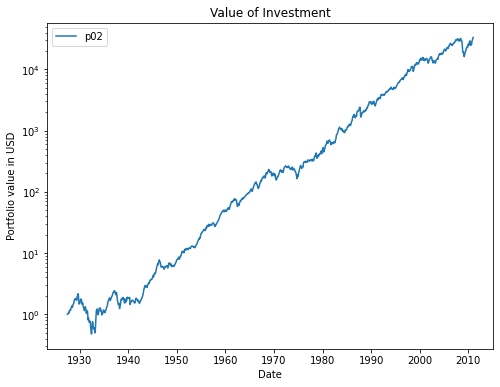

In [72]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports1:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

#### 1.5b: The loser portfolio

In [73]:
print("The cumulative return of the loser portfolio (p01) is:", str((pltdata['p01'].iloc[-1]-1)*100), "%")

The cumulative return of the loser portfolio (p01) is: 59843.64062273439 %


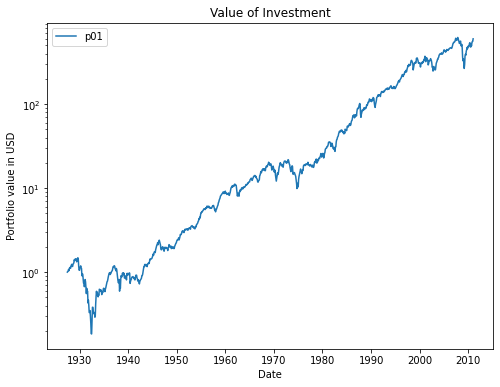

In [74]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports2:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

#### 1.5c: The long/short ind-mom portfolio

In [75]:
print("The cumulative return of the long/short ind-mom portfolio (MOM) is:", str((pltdata['MOM'].iloc[-1]-1)*100), "%")

The cumulative return of the long/short ind-mom portfolio (MOM) is: 68371.04275552201 %


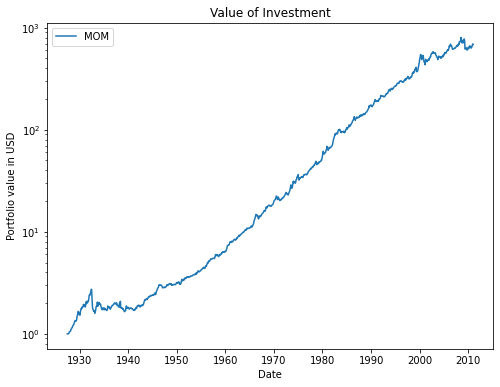

In [76]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports3:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

#### 1.5d: The market

In [77]:
print("The cumulative return of the market (Mkt) is:", str((pltdata['MktRF'].iloc[-1]-1)*100), "%")

The cumulative return of the market (Mkt) is: 190936.03095418715 %


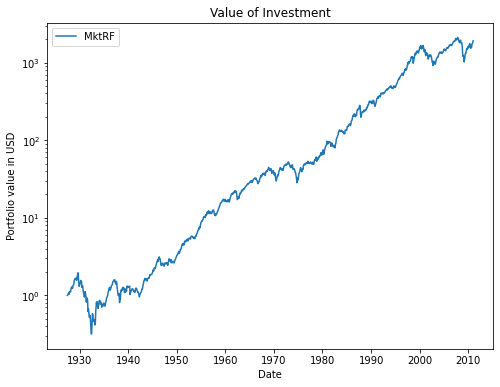

In [78]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports4:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

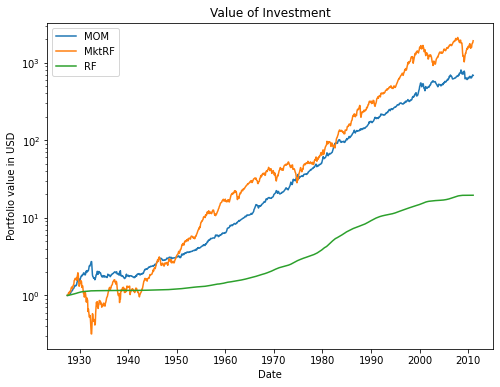

In [79]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports5:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

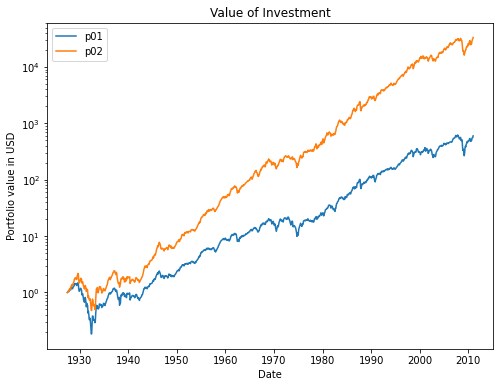

In [80]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports6:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

## 1.6: Ind-mom loss

Industry momentum had a big loss in 3 consecutive months in 2009. Which months? How did the market do those months? What do you think happened?

In [81]:
plotdata1

,portfolio,mdate,return,RF,grossRET,RET,cumRET,date
0,p01,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
1,p02,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
2,RF,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
3,MktRF,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
4,MOM,192706,None,NaN,1.000000,NaN,1.000000,1927-06-30
...,...,...,...,...,...,...,...,...
5000,p01,201012,NaN,0.0001,1.072293,0.072293,599.436406,2010-12-31
5001,p02,201012,NaN,0.0001,1.059300,0.059300,33364.360860,2010-12-31
5002,RF,201012,NaN,0.0001,1.000100,0.000100,19.520580,2010-12-31
5003,MktRF,201012,NaN,0.0001,1.067800,0.067700,1910.360310,2010-12-31


In [82]:
# Convert portfolio values (plotdata1) to wide format (for matplotlib) with returns as values
pltdata_RET_2009 = plotdata1.pivot_table(index=['date'], columns='portfolio', values='RET').reset_index()

In [83]:
pltdata_RET_2009 = pltdata_RET_2009[977:989]

In [84]:
pltdata_RET_2009

portfolio,date,MOM,MktRF,RF,p01,p02
977,2009-01-31,0.044507,-0.0775,0.0000,-0.111867,-0.067360
978,2009-02-28,0.044127,-0.1012,0.0001,-0.132753,-0.088627
979,2009-03-31,-0.040613,0.0876,0.0001,0.114600,0.073987
980,2009-04-30,-0.171020,0.1104,0.0001,0.254707,0.083687
981,2009-05-31,0.004133,0.0673,0.0000,0.054553,0.058687
982,2009-06-30,0.031160,-0.0028,0.0000,-0.025907,0.005253
983,2009-07-31,-0.013540,0.0824,0.0001,0.114573,0.101033
984,2009-08-31,-0.026467,0.0318,0.0001,0.045007,0.018540
985,2009-09-30,-0.018200,0.0452,0.0000,0.062013,0.043813
986,2009-10-31,0.013020,-0.0284,0.0000,-0.036660,-0.023640


* Industry momentum had a big loss in 3 consecutive months in 2009. Which months? July, August, and September 2009

* How did the market do those months? The market had quite good positive returns during these months

* What do you think happened? Momentum crashes --> Sorting losing portfolios in the winner ones